Modelado predictivo

Importación de librerias

In [86]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [87]:
df = pd.read_parquet('../data/clean/agaricus-lepiota.parquet')
df_copy = df.copy()
df_copy.info()

<class 'pandas.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   poisonus                  8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   category
 14  sta

Convertir variable objetivo en binaria(label encondig)

In [88]:
label_enconder = LabelEncoder()
df_copy['poisonus'] = label_enconder.fit_transform(df_copy['poisonus'])
df_copy.info()

<class 'pandas.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   poisonus                  8124 non-null   int64   
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   category
 14  sta

ONE HOT ENCONDING

In [89]:
#Inicializar el OneHotEncoder
enconder = OneHotEncoder(sparse_output=False)

#Seleccionar las columnas a codificar
cols_categorical = df_copy.select_dtypes(include='category').columns
#cols_categorical
#Aplicar el OneHotEncoder a las columnas seleccionadas
encoded_data = enconder.fit_transform(df_copy[cols_categorical])
#Crear un DataFrame con los datos codificados
encoded_df = pd.DataFrame(encoded_data, columns=enconder.get_feature_names_out(cols_categorical))
#Concatenar el DataFrame original con el DataFrame codificado
df_encoded = pd.concat([df_copy.drop(cols_categorical, axis=1), encoded_df], axis=1)
df_encoded.head()

,poisonus,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Separación entre x e y

In [90]:
X = df_encoded.drop(columns='poisonus')
Y = df_encoded['poisonus']
print(X)
print(Y)

      cap-shape_bell  cap-shape_conical  cap-shape_convex  cap-shape_flat  \
0                0.0                0.0               1.0             0.0   
1                0.0                0.0               1.0             0.0   
2                1.0                0.0               0.0             0.0   
3                0.0                0.0               1.0             0.0   
4                0.0                0.0               1.0             0.0   
...              ...                ...               ...             ...   
8119             0.0                0.0               0.0             0.0   
8120             0.0                0.0               1.0             0.0   
8121             0.0                0.0               0.0             1.0   
8122             0.0                0.0               0.0             0.0   
8123             0.0                0.0               1.0             0.0   

      cap-shape_knobbed  cap-shape_sunken  cap-surface_fibrous  \
0        

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

PCA

In [92]:
# Definir PCA
pca = PCA(n_components=2, random_state=42)

# Ajustar SOLO con train
X_train_pca = pca.fit_transform(X_train)

# Proyectar test también (aunque aquí solo usamos train para visualizar)
X_test_pca = pca.transform(X_test)

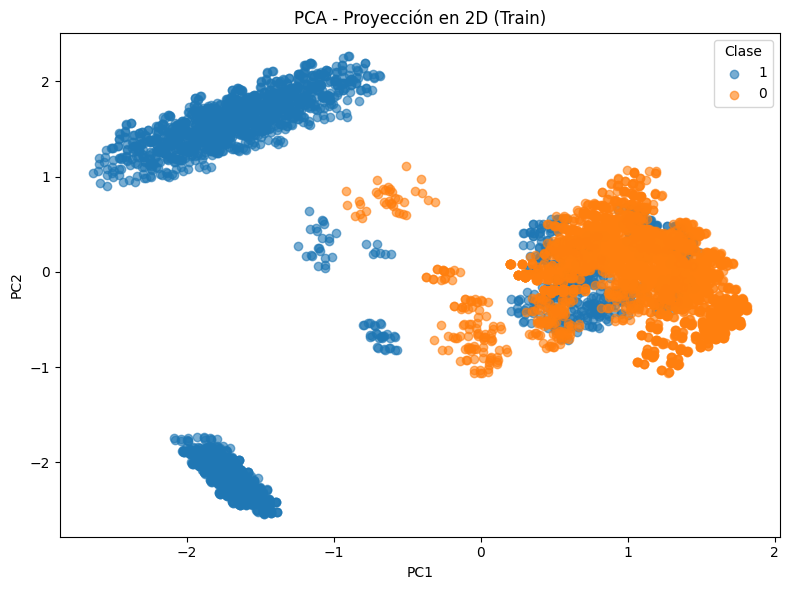

In [93]:
plt.figure(figsize=(8,6))

for label in Y_train.unique():
    subset = X_train_pca[Y_train == label]
    plt.scatter(subset[:,0], subset[:,1], label=label, alpha=0.6)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - Proyección en 2D (Train)")
plt.legend(title="Clase")
plt.tight_layout()
plt.show()

In [94]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)

print("Accuracy sin PCA:", accuracy_score(Y_test, y_pred))

Accuracy sin PCA: 1.0


In [95]:
X_train.shape

(6499, 115)

Reducir features

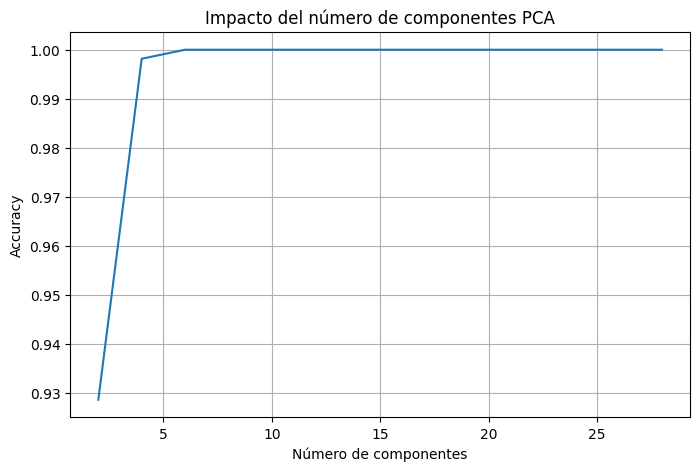

In [96]:
n_features = np.arange(2, 30, 2)
scores = []

for n in n_features:

    # PCA
    pca = PCA(n_components=n, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_pca, Y_train)

    # Evaluar
    y_pred = rf.predict(X_test_pca)
    acc = accuracy_score(Y_test, y_pred)

    scores.append(acc)

# 👇 La gráfica va fuera del bucle
plt.figure(figsize=(8,5))
sns.lineplot(x=n_features, y=scores)

plt.xlabel("Número de componentes")
plt.ylabel("Accuracy")
plt.title("Impacto del número de componentes PCA")
plt.grid(True)
plt.show()

Clustering

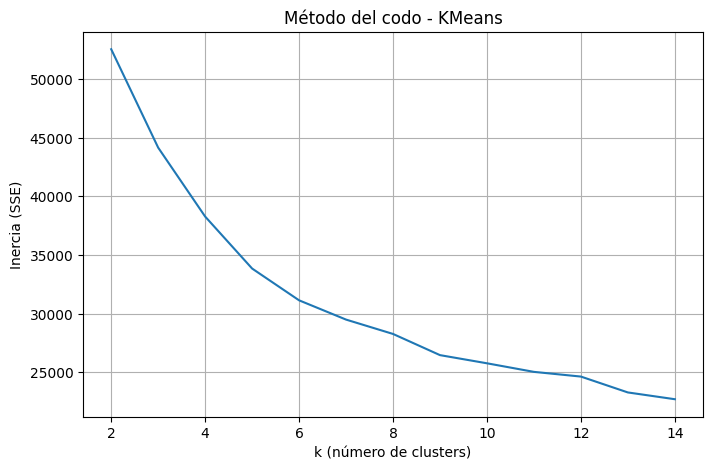

In [97]:
scores = []
k_values = range(2, 15)  # rango típico (ajústalo si quieres)

for k in k_values:
    # Definir KMeans y ajustar
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train_pca)  # o X_train si no usas PCA
    
    # Guardar el score (inercia)
    scores.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
sns.lineplot(x=list(k_values), y=scores)
plt.xlabel("k (número de clusters)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del codo - KMeans")
plt.grid(True)
plt.show()

In [98]:
k_optimo = 3

kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)

clusters = kmeans.fit_predict(X_train_pca)  # o X_train si no usas PCA

In [99]:
df_clusters = pd.DataFrame({
    "cluster": clusters,
    "clase_real": Y_train.values
})

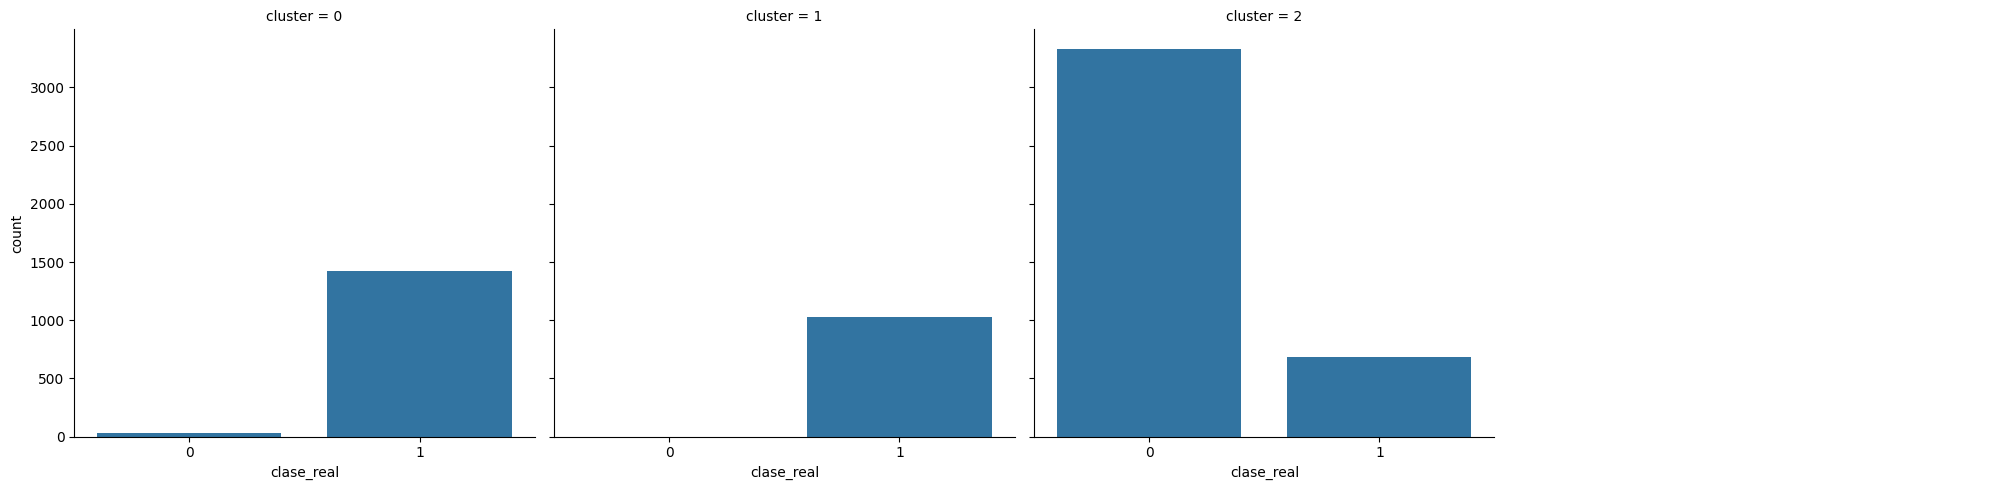

In [100]:
ax = sns.catplot(
    col="cluster",
    x="clase_real",
    data=df_clusters,
    kind="count",
    col_wrap=4
)

In [101]:
pca = PCA(n_components=2, random_state=42)

X_pca = pca.fit_transform(X_train)  

In [102]:
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_train)

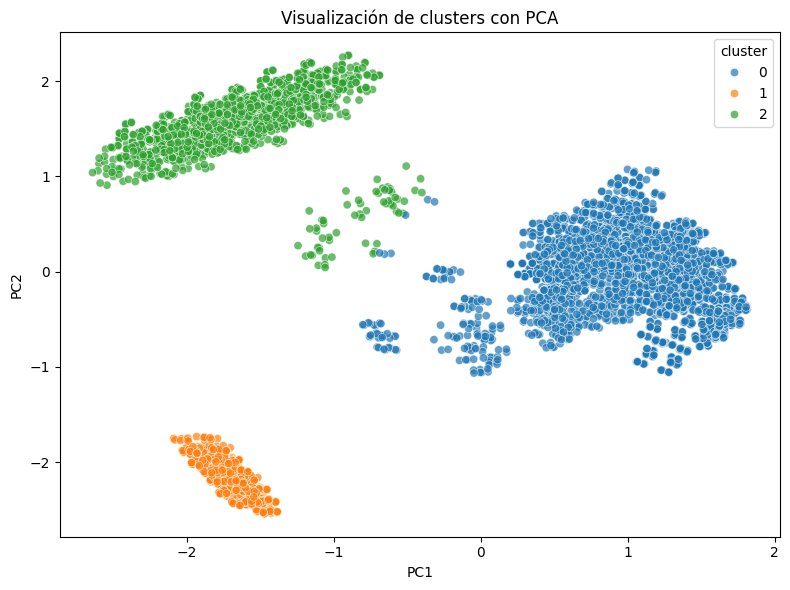

In [103]:
df_plot = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "cluster": clusters
})

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df_plot,
    x="PC1",
    y="PC2",
    hue="cluster",
    palette="tab10",
    alpha=0.7
)

plt.title("Visualización de clusters con PCA")
plt.tight_layout()
plt.show()

rf con pca

In [104]:
pca = PCA(n_components=10, random_state=42)  # usa el número que viste óptimo

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [105]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train_pca, Y_train)

y_pred = rf.predict(X_test_pca)

print("Accuracy RF con PCA:", accuracy_score(Y_test, y_pred))

Accuracy RF con PCA: 1.0


In [106]:
rf.fit(X_train, Y_train)
print("Accuracy RF sin PCA:", accuracy_score(Y_test, rf.predict(X_test)))

Accuracy RF sin PCA: 1.0


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_train_pca)


In [107]:
df_compare = pd.DataFrame({
    "cluster": clusters,
    "clase_real": Y_train.values
})

print(pd.crosstab(df_compare["cluster"], df_compare["clase_real"]))

clase_real     0     1
cluster               
0           3332   681
1              0  1028
2             33  1425


In [108]:
# Invertir etiquetas si hace falta
acc1 = accuracy_score(Y_train, clusters)
acc2 = accuracy_score(Y_train, 1 - clusters)

print("Accuracy clustering aproximada:", max(acc1, acc2))

Accuracy clustering aproximada: 0.6708724419141406
